# Dimensionality Reduction

This section introduces the practical applications of dimensionality reduction.

The first thing you will notice is that it allows us to take a high-dimensional dataset and visualise it in two dimensions. Visualisation is so important and this is one of the main reasons for performing it.

Second, you won't notice much here, but when you start using larger datasets with high numbers of dimensions, you will not want to wait all night just to run one train of your algorithm.

We've touched on some concepts before (e.g. collinearity) and they crop up again here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition, datasets, linear_model, manifold
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

## PCA

The iris dataset has four components. Let's measure how much each of the four principal components explains the total variance.

In [3]:
pca = decomposition.PCA(n_components=4)
pca.fit(X)
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

The first component explains a whopping 92% of the variance. Most rules of thumb would probably get you to just cut it off there. Let's see what the first PC looks like after transforming the data into the new domain (`.transform` effectively does the dot-product projection for us)

In [4]:
X_p = pca.transform(X)

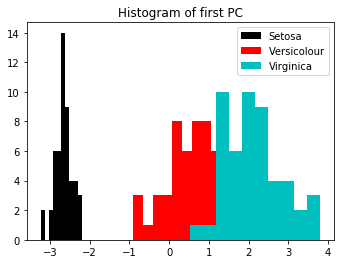

In [5]:
fig = plt.figure(figsize=(5.5,4))
plt.title('Histogram of first PC')
plt.hist(X_p[y==0, 0], facecolor='k', label="Setosa")
plt.hist(X_p[y==1, 0], facecolor='r', label="Versicolour")
plt.hist(X_p[y==2, 0], facecolor='c', label="Virginica")
plt.legend()
plt.show()

We can see that Setosa is well separated. The other two are not quite as separated, but appear to show a good normal distribution.

Let's take a look at what the second dimesion looks like.

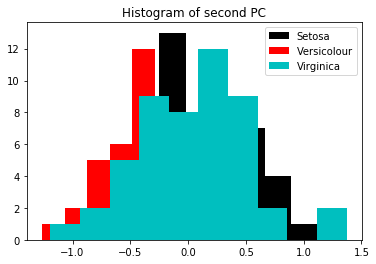

In [6]:
fig = plt.figure()
plt.title('Histogram of second PC')
plt.hist(X_p[y==0, 1], facecolor='k', label="Setosa")
plt.hist(X_p[y==1, 1], facecolor='r', label="Versicolour")
plt.hist(X_p[y==2, 1], facecolor='c', label="Virginica")
plt.legend()
plt.show()

Notice how little variance this second dimension shows compared to the first. (I.e. look at the min/max of the first plot and compare to this).

Generally you will find that the components with more variance generally have better class separation (because the high variance is accounted by the class separation, not the variance of each class)

If you look below, the third looks even worse.

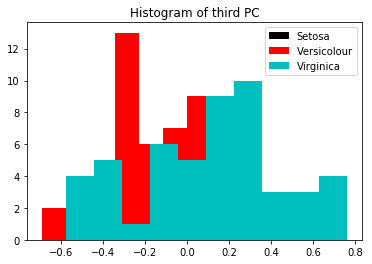

In [7]:
fig = plt.figure()
plt.title('Histogram of third PC')
plt.hist(X_p[y==0, 2], facecolor='k', label="Setosa")
plt.hist(X_p[y==1, 2], facecolor='r', label="Versicolour")
plt.hist(X_p[y==2, 2], facecolor='c', label="Virginica")
plt.legend()
plt.show()

Now let's take a look at the data in two dimensions.

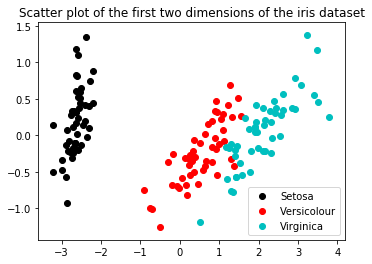

In [8]:
fig = plt.figure(figsize=(5.5,4))
plt.title('Scatter plot of the first two dimensions of the iris dataset')
plt.scatter(X_p[y==0, 0], X_p[y==0, 1], c='k', label="Setosa")
plt.scatter(X_p[y==1, 0], X_p[y==1, 1], c='r', label="Versicolour")
plt.scatter(X_p[y==2, 0], X_p[y==2, 1], c='c', label="Virginica")
plt.legend()
plt.show()

Again, you can see that there is a large variance in the first (x) dimension, a range of +/- 4, whereas the second dimension (y) only has +/- 1.

### PCA with Classification

Now we will:

- Using a logistic classifier, classify the iris dataset
- Calculate the accuracy score (or score of your choice)
- Now perform PCA and reduce to a single component. Repeat the classification and scoring.
- How much different is the result? Is it significant?

In [9]:
mdl = linear_model.LogisticRegression()
print("No PCA accuracy:", mdl.fit(X, y).score(X, y))

No PCA accuracy: 0.96


In [10]:
mdl = linear_model.LogisticRegression()
print("With PCA (first componennt) accuracy:", mdl.fit(X_p[:,0].reshape(150,1), y).score(X_p[:,0].reshape(150,1), y))

With PCA (first componennt) accuracy: 0.9


In [11]:
mdl = linear_model.LogisticRegression()
print("With PCA (two components) accuracy:", mdl.fit(X_p[:,0:1], y).score(X_p[:,0:1], y))

With PCA (two components) accuracy: 0.9


You can see that we have marginally reduced accuracy. Often, people like to reduce the number of dimensions to 2 or 3 for plotting, then increase it back up for actual classification.

This becomes a compromise between simplicity/performance and accuracy.

## SOM

Unfortunately there is no SOM implementation in sklearn so I've used the implementation from [MiniSOM](https://github.com/JustGlowing/minisom).

Here we're going to look at the Iris data in a SOM. What we expect to see is clusters of points which correspond to a high similarity (low euclidean distance).


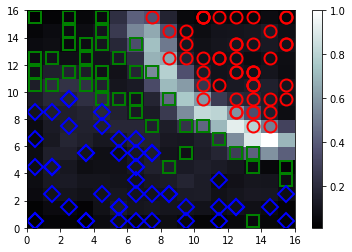

In [12]:
from minisom import MiniSom

np.random.seed(42)

# Initialization and training - have a play with these numbers
som = MiniSom(16, 16, 4, sigma=1.3, learning_rate=1)
som.random_weights_init(X)
som.train_random(X, 5000)

# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[y[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y[cnt]], markersize=12, markeredgewidth=2)
plt.show()

As you can see the z-axis (colour) represents the distance between points. The three different marker colours correspond to the Iris target variable.

If we didn't have the target variable it is possible to extract the clusters from the SOM, but I'm not going to do it here.

Also, I'm not setting a task because in reality they are hardly used because Manifold learning tends to perform better and is easier to interpret.


## Manifold learning and t-SNE

Manifold learning is all about trying to find the nonlinear manifolds in the data.

t-SNE is about the best example of this and is really easy to use. So easy in fact, that it is used all the time as an initial visualisation step.

Thankfully t-SNE is now implemented in sklearn.

Tasks:

- Play around with the TSNE parameters. Notice how much the result changes.

In [13]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=42, learning_rate=100, n_iter=1000 )
X_tsne = tsne.fit_transform(X)

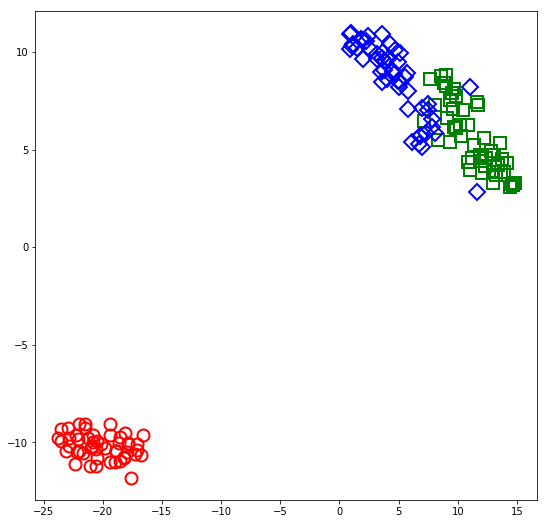

In [14]:
plt.figure(figsize=(9,9))
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for i in range(X_tsne.shape[0]):
    plt.plot(X_tsne[i, 0], X_tsne[i, 1], markers[y[i]], markerfacecolor='None',
             markeredgecolor=colors[y[i]], markersize=12, markeredgewidth=2)
plt.show()

When messing around with the parameters, we can see tha the results are wildly different.

This is where you have to be careful. But generally, if you can clearly see separated clusters, there are probably clusters within the data.

The tricky part is deciding when you are seeing clusters and when it is just clustering random noise.

### t-SNE with the Digits Dataset

Next, let's take a look at the digits dataset like in the slides. The results are pretty cool.

Computing PCA projection
Computing t-SNE embedding


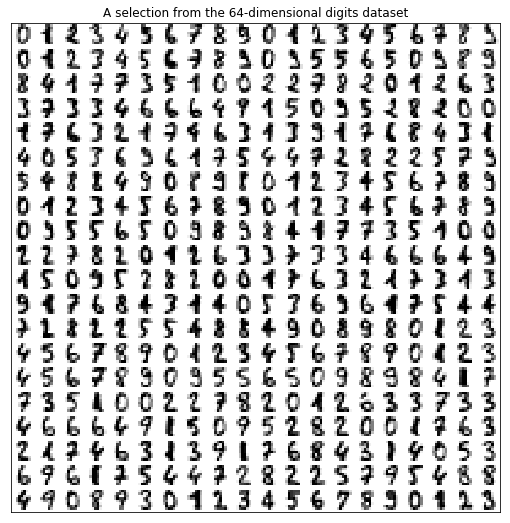

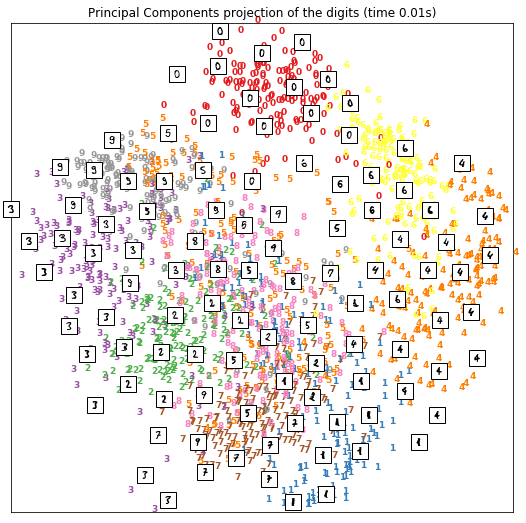

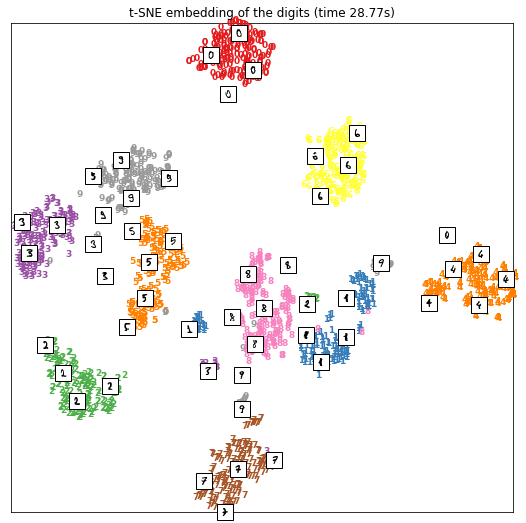

In [15]:
## importing the required packages
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
## Loading and curating the data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure(figsize=(9,9))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1((y[i] + 1) / 11.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(9,9))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=42)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [16]:
samples = np.random.multivariate_normal([0, 0, 0, 0], [[1, 0, 0, 0],[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], 1000)

## Tasks

- Perform PCA on the digits dataset. Plot the results. What does it look like?
- Try playing with the T-SNE parameters
- Above, the `samples` array is a 4D gaussian distributed random sample. Produce a t-SNE plot of that random data. What do you see?